# Extract Features from NLP

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle

with open('df1.data','rb') as data:
    df = pickle.load(data)
df

,Carácter del procedimiento,Forma del procedimiento,Descripción del Anuncio,Nombre de la UC,Entidad federativa,Tipo de contratación,Publicación del anuncio,Artículo,Plantilla,Forma_Procedimiento_Presencial,...,Contratación_servicios,Contratación_obra_publica,Contratación_arrendamientos,Contratación_servicios_op,Plantilla_Proyecto,Plantilla_Adjudicación,Plantilla_Licitación,Plantilla_Invitación,Plantilla_Reporte,Plantilla_Contratos
0,nacional,presencial,"[mejor, iluminacion, iglesi, san, miguel]","[qroocozumeldireccion, obras, public, ]",sur,obra publica,2020-08-10 12:49,nan,licitacion,1,...,0,1,0,0,0,0,1,0,0,0
1,nacional,presencial,"[adquisicion, uniform, direccion, segur, publi...","[qroocozumeldireccion, obras, public, ]",sur,adquisiciones,2020-08-14 11:19,nan,licitacion,1,...,0,0,0,0,0,0,1,0,0,0
2,nan,nan,"[proyect, ejecut, jardin, vecinal, coloni, ame...","[gtosalamancadireccion, general, obras, public, ]",bajio,servicios relacionados con la op,2020-03-20 12:35,43,adjudicacion,0,...,0,0,0,1,0,1,0,0,0,0
3,nacional,mixta,"[construccion, deport, bicentenari]","[mexnicol, romerodireccion, obras, public, ]",NaN,obra publica,2020-06-08 10:26,43,invitacion,0,...,0,1,0,0,0,0,0,1,0,0
4,nacional,mixta,"[acondicion, centr, cultural, deport]","[mexnicol, romerodireccion, obras, public, ]",NaN,obra publica,2020-06-08 10:16,43,invitacion,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,nacional,mixta,"[maquinari, equip, industrial]","[semardireccion, general, adjunt, adquisicion, ]",NaN,adquisiciones,2020-08-06 13:52,42,adjudicacion,0,...,0,0,0,0,0,1,0,0,0,0
96118,nacional,presencial,"[jabon, tocador, det, polv, jabon, lavanderi]","[diconsadireccion, comercializacion, vss]",norte,adquisiciones,2020-08-06 13:43,41,adjudicacion,1,...,0,0,0,0,0,1,0,0,0,0
96119,nacional,presencial,"[construccion, , aul, didact, obra, exterior, ...","[chisinstitut, infraestructur, fisic, educ, ch...",pacifico sur,obra publica,2020-08-06 13:32,43,adjudicacion,1,...,0,1,0,0,0,1,0,0,0,0
96120,nacional,presencial,"[adquisicion, muebl, mader]","[inpidireccion, adquisicion, obra, public, ayb]",NaN,adquisiciones,2020-08-12 13:55,41,adjudicacion,1,...,0,0,0,0,0,1,0,0,0,0


**Get frequencies**

In [3]:
def get_frequencies(bag_words):
    '''
    This function gets a dictionary of frequencies for all the descriptions
    Input:
        bag_words: List of lists of words
    Output:
        freq_dict: a dictionary of the word and its frquency of all
    '''
    # Initialize local variables
    freq_dict = {}
    # Iterate over every row
    for description in bag_words:
        # Iterate over every word in the row
        for word in description:
            # Add one if the word is present 0 if it is not
            freq_dict[word] = freq_dict.get(word,0)+1
    # Drop the blank frequencies
    freq_dict[''] = 0

    return freq_dict

In [4]:
# Get the frequencies and save it in a dictionary
freq_dict = get_frequencies(df['Descripción del Anuncio'].values)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_freq(freq_dict):
    '''
    This function plots the top 10 most used words
    '''
    # Sort the dictionary by value to plot
    freq_dict_ = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    # Unzip the dictionary to get the names and frequencies separated from the sorted list
    x, y = zip(*freq_dict_[:10])
    # plot
    sns.barplot(np.arange(len(x)), y)
    plt.xticks(np.arange(len(x)), x, rotation=90) 
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

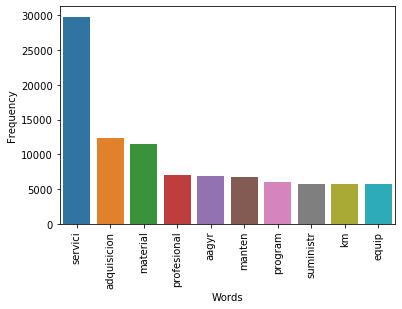

In [6]:
plot_freq(freq_dict)

In [7]:
def word_in_bag(word, bag):
    '''
    Return the evaluation if the word is contained in the bag (1) or not (0).
    '''
    if word in bag:
        return 1
    else:
        return 0

In [8]:
def most_freq_words(freq_dict_data, data, n, column_name):
    '''
    This function creates the n most used words of the total corpus
    Input:
        freq_dict: the frequency bag of words for all the corpus
        data: the column to evaluate
        n: parameter of n most used words
        column_name: the column where the most frequencies where obtained
    '''
    # Sort the dictionary by value of each key
    freq_dict_ = sorted(freq_dict_data.items(), key=lambda x: x[1], reverse=True)
    # Obtain the first n most used words
    most_used_words, _ = zip(*freq_dict_[:n])
    # Iterate over each most used word
    for word in most_used_words:
        # Apply the evaluation word_in_bag to get if the word is contained in the corpus of each row
        if column_name == 'Nombre de la UC':
            data['Most_used_UC_word_'+word] = data.apply(lambda row: word_in_bag(word,row[column_name]),axis=1)
        else:
            data['Most_used_description_word_'+word] = data.apply(lambda row: word_in_bag(word,row[column_name]),axis=1)

    return data.drop([column_name], axis=1)

In [9]:
# Get the most frequent words into binarized columns
df = most_freq_words(freq_dict, df, 3, 'Descripción del Anuncio')

Split date column

In [10]:
import re

def split_date(string):
    '''
    The function split the date strings into separeted columns with split characters of '-',' ', and ':'.
    Input:
        string: the date string
    Output:
        a list with the separeted string as integers
    '''

    return [int(string_) for string_ in re.split('-|\ |\:', string)]

In [11]:
def transform_date_columns(data):
    '''
    This function transforms a date string (AAAA-MM-DD HH:mm) to separate columns
    Input:
        data: 2D array of values to split.
    Output:
        date_divided: 2D array with the elements vectorized into separate elements
    '''
    # Check if column is type date is string
    if data.dtype == 'O':
        # Split the string for each list of strings
        date_divided = [split_date(string) for string in data]

    return date_divided

In [12]:
# Get the date divided and add it to the original dataframe
df = pd.concat([ df.drop('Publicación del anuncio',axis=1), pd.DataFrame(transform_date_columns(df['Publicación del anuncio'].values),columns=['Año_pub','Mes_pub','Dia_pub','Hora_pub','Min_pub'])], axis=1)
df

,Carácter del procedimiento,Forma del procedimiento,Nombre de la UC,Entidad federativa,Tipo de contratación,Artículo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,Forma_Procedimiento_Mixta,...,Plantilla_Reporte,Plantilla_Contratos,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Año_pub,Mes_pub,Dia_pub,Hora_pub,Min_pub
0,nacional,presencial,"[qroocozumeldireccion, obras, public, ]",sur,obra publica,nan,licitacion,1,0,0,...,0,0,0,0,0,2020,8,10,12,49
1,nacional,presencial,"[qroocozumeldireccion, obras, public, ]",sur,adquisiciones,nan,licitacion,1,0,0,...,0,0,0,1,0,2020,8,14,11,19
2,nan,nan,"[gtosalamancadireccion, general, obras, public, ]",bajio,servicios relacionados con la op,43,adjudicacion,0,0,0,...,0,0,0,0,0,2020,3,20,12,35
3,nacional,mixta,"[mexnicol, romerodireccion, obras, public, ]",NaN,obra publica,43,invitacion,0,0,1,...,0,0,0,0,0,2020,6,8,10,26
4,nacional,mixta,"[mexnicol, romerodireccion, obras, public, ]",NaN,obra publica,43,invitacion,0,0,1,...,0,0,0,0,0,2020,6,8,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,nacional,mixta,"[semardireccion, general, adjunt, adquisicion, ]",NaN,adquisiciones,42,adjudicacion,0,0,1,...,0,0,0,0,0,2020,8,6,13,52
96118,nacional,presencial,"[diconsadireccion, comercializacion, vss]",norte,adquisiciones,41,adjudicacion,1,0,0,...,0,0,0,0,0,2020,8,6,13,43
96119,nacional,presencial,"[chisinstitut, infraestructur, fisic, educ, ch...",pacifico sur,obra publica,43,adjudicacion,1,0,0,...,0,0,0,0,0,2020,8,6,13,32
96120,nacional,presencial,"[inpidireccion, adquisicion, obra, public, ayb]",NaN,adquisiciones,41,adjudicacion,1,0,0,...,0,0,0,1,0,2020,8,12,13,55


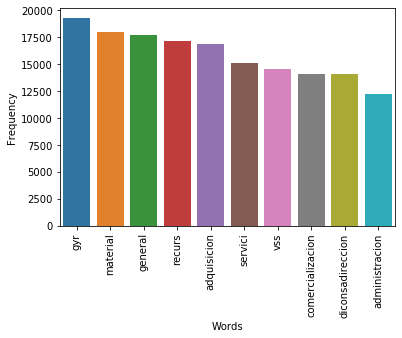

,Carácter del procedimiento,Forma del procedimiento,Entidad federativa,Tipo de contratación,Artículo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,Forma_Procedimiento_Mixta,Entidad_federativa_Norte,...,Most_used_description_word_adquisicion,Most_used_description_word_material,Año_pub,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,nacional,presencial,sur,obra publica,nan,licitacion,1,0,0,0,...,0,0,2020,8,10,12,49,0,0,0
1,nacional,presencial,sur,adquisiciones,nan,licitacion,1,0,0,0,...,1,0,2020,8,14,11,19,0,0,0
2,nan,nan,bajio,servicios relacionados con la op,43,adjudicacion,0,0,0,0,...,0,0,2020,3,20,12,35,0,0,1
3,nacional,mixta,NaN,obra publica,43,invitacion,0,0,1,0,...,0,0,2020,6,8,10,26,0,0,0
4,nacional,mixta,NaN,obra publica,43,invitacion,0,0,1,0,...,0,0,2020,6,8,10,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,nacional,mixta,NaN,adquisiciones,42,adjudicacion,0,0,1,0,...,0,0,2020,8,6,13,52,0,0,1
96118,nacional,presencial,norte,adquisiciones,41,adjudicacion,1,0,0,1,...,0,0,2020,8,6,13,43,0,0,0
96119,nacional,presencial,pacifico sur,obra publica,43,adjudicacion,1,0,0,0,...,0,0,2020,8,6,13,32,0,0,0
96120,nacional,presencial,NaN,adquisiciones,41,adjudicacion,1,0,0,0,...,1,0,2020,8,12,13,55,0,0,0


In [13]:
# Get the frequencies and save it in a dictionary
freq_dict_UC = get_frequencies(df['Nombre de la UC'].values)
# Plot it
plot_freq(freq_dict_UC)
# Get the most frequent words into binarized columns
temp = most_freq_words(freq_dict_UC, df, 3, 'Nombre de la UC')
temp

In [22]:
# Convert nan strings to missing values
temp = temp.replace('nan',np.nan)

In [23]:
# Save the object in a python file\n",
import pickle

with open('df2.data','wb') as data:
    pickle.dump(df, data)

In [25]:
temp.to_csv('clean_data_complete.csv', index=False)